In [53]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


# Importing Stock Data

Firstly,We started with 10 stocks with 2 stock from each industry and then we are going to pick 5 out of 10 stocks based on their past performance and correlation with each othe stocks.

In [2]:
tickers = ['MSFT','GOOGL','PFE','JNJ','JPM', "V", "KO", "NKE", "CVX", "XOM"]
df =  yf.download(tickers, period= '5y')

[*********************100%%**********************]  10 of 10 completed


In [4]:
pf_data = df['Adj Close']
pf_data.head()

Ticker            CVX      GOOGL         JNJ        JPM         KO  \
Date                                                                 
2019-04-15  96.337097  61.326500  119.125519  94.823425  40.236423   
2019-04-16  97.163010  61.595501  120.434402  95.823936  40.193607   
2019-04-17  96.441315  62.007000  120.870697  98.583954  40.476120   
2019-04-18  96.112556  62.073502  119.998108  97.859436  40.647335   
2019-04-22  97.748390  62.688000  120.268600  97.980194  40.578857   

Ticker            MSFT        NKE        PFE           V        XOM  
Date                                                                 
2019-04-15  115.226585  82.427101  32.778385  155.042419  62.560986  
2019-04-16  114.960045  83.347923  31.867226  154.839462  62.987617  
2019-04-17  115.911942  84.230774  31.057304  155.042419  63.166019  
2019-04-18  117.434959  84.676941  30.667925  154.771835  62.933319  
2019-04-22  117.806206  82.930237  30.356407  155.003754  64.306320

<Axes: xlabel='Date'>

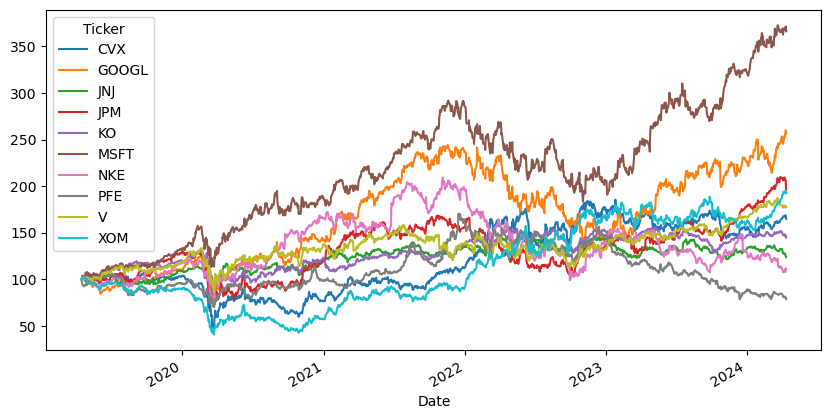

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250
log_returns.cov() * 250

Ticker       CVX     GOOGL       JNJ       JPM        KO      MSFT       NKE  \
Ticker                                                                         
CVX     0.126769  0.039544  0.025757  0.073187  0.033731  0.038115  0.045174   
GOOGL   0.039544  0.102220  0.021058  0.043832  0.026793  0.073148  0.051787   
JNJ     0.025757  0.021058  0.038998  0.025809  0.023249  0.024407  0.021984   
JPM     0.073187  0.043832  0.025809  0.100403  0.036608  0.042948  0.052619   
KO      0.033731  0.026793  0.023249  0.036608  0.044155  0.029135  0.031039   
MSFT    0.038115  0.073148  0.024407  0.042948  0.029135  0.091701  0.052683   
NKE     0.045174  0.051787  0.021984  0.052619  0.031039  0.052683  0.109603   
PFE     0.027442  0.024432  0.027317  0.030288  0.023700  0.026709  0.023588   
V       0.050968  0.050710  0.024747  0.054797  0.033486  0.053845  0.052104   
XOM     0.104258  0.032739  0.020323  0.064161  0.030491  0.028883  0.040762   

Ticker       PFE         V       XOM  
Ticker                                
CVX     0.027442  0.050968  0.104258  
GOOGL   0.024432  0.050710  0.032739  
JNJ     0.027317  0.024747  0.020323  
JPM     0.030288  0.054797  0.064161  
KO      0.023700  0.033486  0.030491  
MSFT    0.026709  0.053845  0.028883  
NKE     0.023588  0.052104  0.040762  
PFE     0.071447  0.027436  0.023666  
V       0.027436  0.076949  0.043823  
XOM     0.023666  0.043823  0.116840

In [8]:
log_returns.corr()

Ticker       CVX     GOOGL       JNJ       JPM        KO      MSFT       NKE  \
Ticker                                                                         
CVX     1.000000  0.347386  0.366320  0.648720  0.450849  0.353510  0.383240   
GOOGL   0.347386  1.000000  0.333524  0.432664  0.398801  0.755519  0.489259   
JNJ     0.366320  0.333524  1.000000  0.412451  0.560252  0.408132  0.336261   
JPM     0.648720  0.432664  0.412451  1.000000  0.549810  0.447594  0.501603   
KO      0.450849  0.398801  0.560252  0.549810  1.000000  0.457867  0.446170   
MSFT    0.353510  0.755519  0.408132  0.447594  0.457867  1.000000  0.525496   
NKE     0.383240  0.489259  0.336261  0.501603  0.446170  0.525496  1.000000   
PFE     0.288343  0.285888  0.517507  0.357601  0.421953  0.329971  0.266552   
V       0.516042  0.571779  0.451749  0.623424  0.574475  0.640996  0.567354   
XOM     0.856654  0.299574  0.301069  0.592386  0.424500  0.279031  0.360200   

Ticker       PFE         V       XOM  
Ticker                                
CVX     0.288343  0.516042  0.856654  
GOOGL   0.285888  0.571779  0.299574  
JNJ     0.517507  0.451749  0.301069  
JPM     0.357601  0.623424  0.592386  
KO      0.421953  0.574475  0.424500  
MSFT    0.329971  0.640996  0.279031  
NKE     0.266552  0.567354  0.360200  
PFE     1.000000  0.370021  0.259016  
V       0.370021  1.000000  0.462169  
XOM     0.259016  0.462169  1.000000

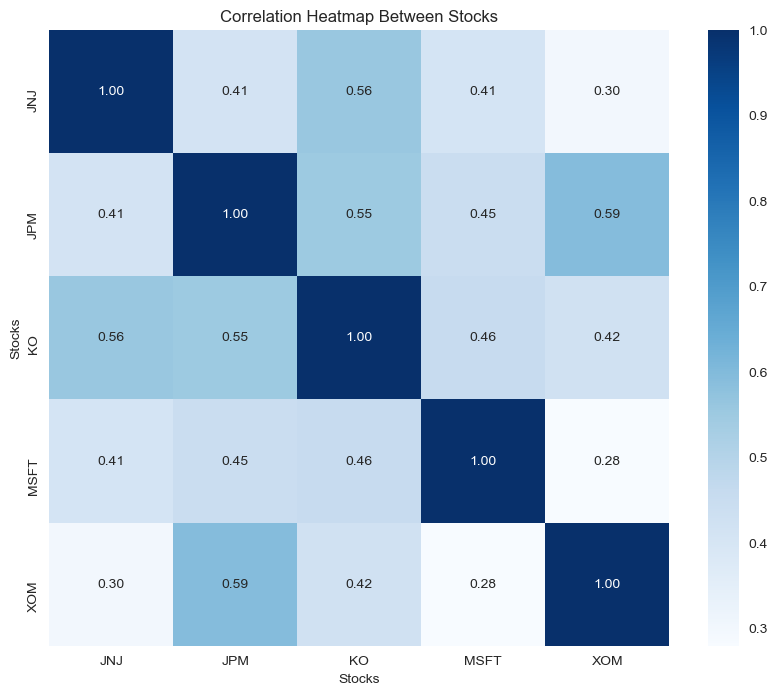

In [214]:
# Calculate the correlation matrix
correlation_matrix = log_returns.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap Between Stocks')
plt.xlabel('Stocks')
plt.ylabel('Stocks')
plt.show()

In [252]:
correlation_matrix 

Ticker       JNJ       JPM        KO      MSFT       XOM
Ticker                                                  
JNJ     1.000000  0.412452  0.560252  0.408133  0.301069
JPM     0.412452  1.000000  0.549810  0.447594  0.592386
KO      0.560252  0.549810  1.000000  0.457866  0.424500
MSFT    0.408133  0.447594  0.457866  1.000000  0.279031
XOM     0.301069  0.592386  0.424500  0.279031  1.000000

After see the past perforamnce and correlation matrix, we decided to pick 5 stocks which are Microsoft, JP Morgan, Coca Cola, Johnson and johnson, and Xxon Mobil

# Portfolio Optimization

In [19]:
tickers = ['MSFT','JNJ','JPM', "KO", "XOM"]
df =  yf.download(tickers, period= '5y')

[*********************100%%**********************]  5 of 5 completed


In [20]:
pf_data = df['Adj Close']
pf_data.head()

Ticker             JNJ        JPM         KO        MSFT        XOM
Date                                                               
2019-04-15  119.125542  94.823441  40.236420  115.226578  62.560966
2019-04-16  120.434418  95.823929  40.193607  114.960045  62.987617
2019-04-17  120.870705  98.583954  40.476124  115.911926  63.166035
2019-04-18  119.998108  97.859451  40.647343  117.434952  62.933315
2019-04-22  120.268608  97.980171  40.578854  117.806198  64.306320

<Axes: xlabel='Date'>

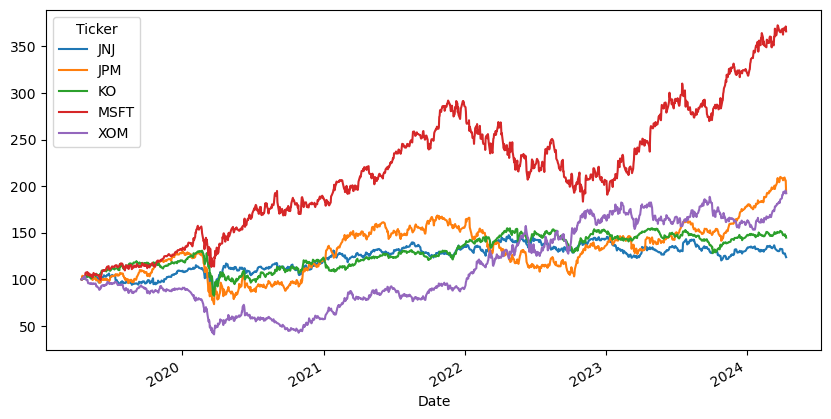

In [21]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [22]:
log_returns = np.log(pf_data / pf_data.shift(1))

<Axes: xlabel='Date'>

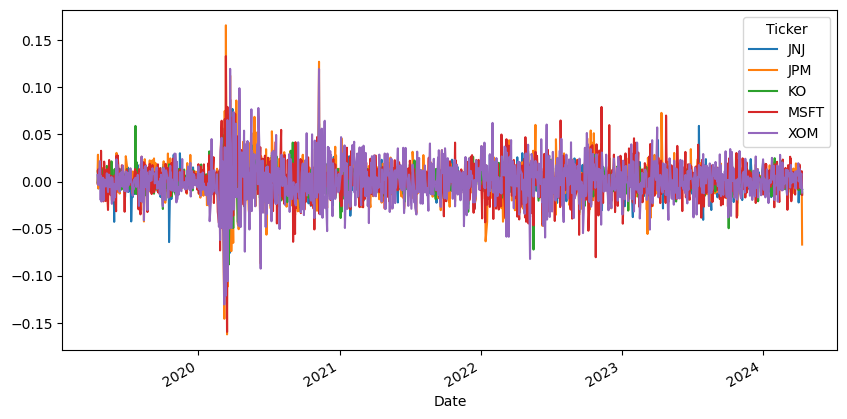

In [148]:
log_returns.plot(figsize = (10,5))

In [23]:
log_returns.mean() * 250
log_returns.cov() * 250

Ticker       JNJ       JPM        KO      MSFT       XOM
Ticker                                                  
JNJ     0.038998  0.025809  0.023249  0.024407  0.020323
JPM     0.025809  0.100403  0.036608  0.042948  0.064161
KO      0.023249  0.036608  0.044155  0.029135  0.030491
MSFT    0.024407  0.042948  0.029135  0.091701  0.028883
XOM     0.020323  0.064161  0.030491  0.028883  0.116840

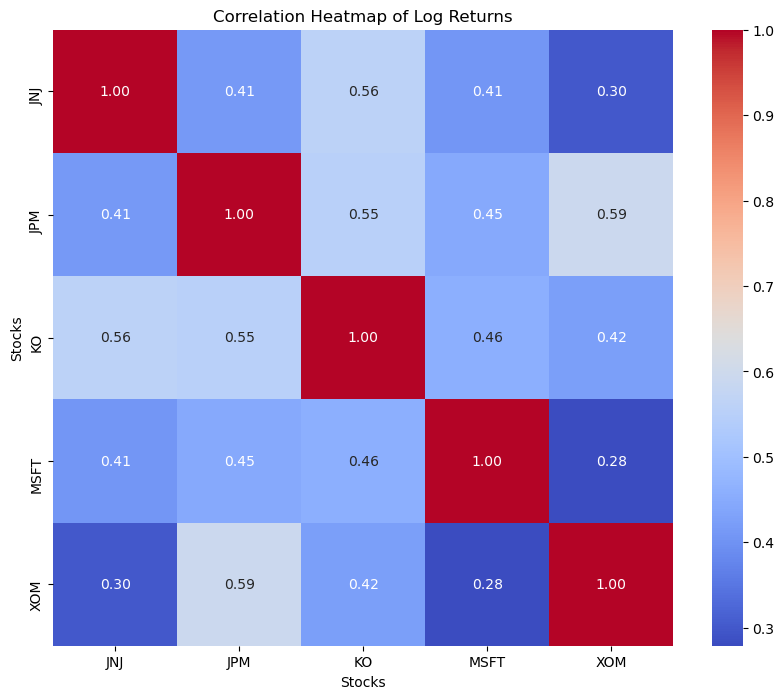

In [24]:
# Calculate the correlation matrix
correlation_matrix = log_returns.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Log Returns')
plt.xlabel('Stocks')
plt.ylabel('Stocks')
plt.show()

In [25]:
num_assets = len(tickers)

In [26]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.08975145, 0.35281851, 0.09419804, 0.36961428, 0.09361771])

In [27]:
weights[0] + weights[1]

0.4425699659498766

In [28]:
np.sum(weights * log_returns.mean()) * 250

0.1644044574765745

In [29]:
np.dot(weights.T, 
       np.dot(log_returns.cov() * 250, weights))

0.05318308152319832

In [30]:
log_returns.cov()


Ticker       JNJ       JPM        KO      MSFT       XOM
Ticker                                                  
JNJ     0.000156  0.000103  0.000093  0.000098  0.000081
JPM     0.000103  0.000402  0.000146  0.000172  0.000257
KO      0.000093  0.000146  0.000177  0.000117  0.000122
MSFT    0.000098  0.000172  0.000117  0.000367  0.000116
XOM     0.000081  0.000257  0.000122  0.000116  0.000467

In [31]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.23061457352734305

In [32]:
pf_returns = []
pf_volatilities = []
pf_weights = []

In [33]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_weights.append(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities, pf_weights

([0.09189714482458956,
  0.10804071450741085,
  0.10221356121823955,
  0.13611069467306347,
  0.12111741115405518,
  0.13075171127978347,
  0.14903073085035906,
  0.11036039043989518,
  0.11981206742946345,
  0.16126720399359384,
  0.11448480099556399,
  0.11833563178445063,
  0.13928997761045886,
  0.1294667678806089,
  0.1052446784803028,
  0.14474267450062261,
  0.15038902411010993,
  0.10076114896774264,
  0.13255502078245987,
  0.12022666730643654,
  0.11247474708962786,
  0.12773741734811114,
  0.12946500048676138,
  0.11969343030725846,
  0.1261800131363043,
  0.13054189663103108,
  0.1400262839459078,
  0.11863029861058584,
  0.13317241849704428,
  0.11150008408523333,
  0.13769503864649718,
  0.13191472087477377,
  0.14174923193524186,
  0.09728428547540283,
  0.09161600403160207,
  0.1615350189159271,
  0.15286393945735863,
  0.11261092705016533,
  0.09219775026966993,
  0.11664902135563564,
  0.12836230348218133,
  0.11185252332980225,
  0.12223645854817443,
  0.131909559999

In [34]:
portfolios = ({'Return': pf_returns, 'Volatility': pf_volatilities})

for counter, symbol in enumerate(pf_data.columns.tolist()):
    #print(counter, symbol)
    portfolios[symbol+' weight'] = [w[counter] for w in pf_weights]

In [35]:
portfolios = pd.DataFrame(portfolios)


In [36]:
portfolios.head()


Return  Volatility  JNJ weight  JPM weight  KO weight  MSFT weight  \
0  0.091897    0.188367    0.304184    0.071126   0.349022     0.063151   
1  0.108041    0.199938    0.244349    0.080599   0.263285     0.110462   
2  0.102214    0.204207    0.272812    0.222324   0.208207     0.059698   
3  0.136111    0.211347    0.106350    0.306707   0.311664     0.255987   
4  0.121117    0.197814    0.270439    0.120960   0.181878     0.194471   

   XOM weight  
0    0.212517  
1    0.301305  
2    0.236959  
3    0.019292  
4    0.232252

In [38]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Return         0.082858
Volatility     0.179361
JNJ weight     0.426331
JPM weight     0.061909
KO weight      0.400960
MSFT weight    0.099116
XOM weight     0.011684
Name: 858, dtype: float64

In [39]:
max_vol_port = portfolios.iloc[portfolios['Return'].idxmax()]
# idxmin() gives us the minimum value in the column specified.                               
max_vol_port

Return         0.210374
Volatility     0.253557
JNJ weight     0.005195
JPM weight     0.187166
KO weight      0.089659
MSFT weight    0.669406
XOM weight     0.048574
Name: 123, dtype: float64

In [40]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Return'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [45]:
# Finding the optimal portfolio - Sharpe Ratio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Return']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Return         0.210374
Volatility     0.253557
JNJ weight     0.005195
JPM weight     0.187166
KO weight      0.089659
MSFT weight    0.669406
XOM weight     0.048574
Name: 123, dtype: float64

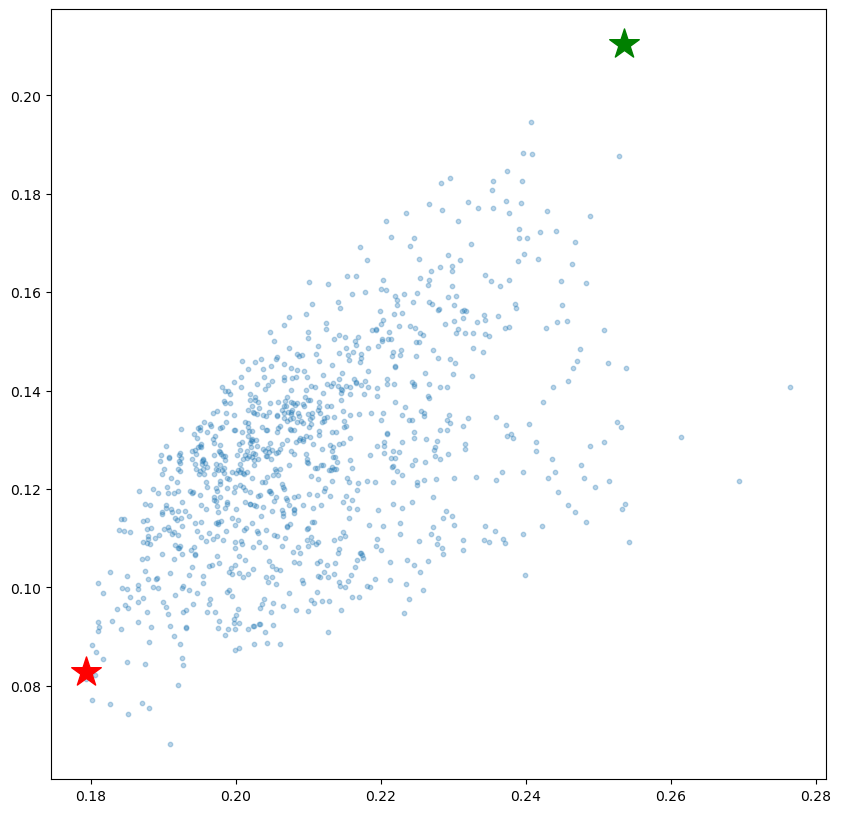

In [46]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Return'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

# Calulating CAPM

In [47]:
tickers = ['MSFT','JNJ','JPM', "KO", "XOM", '^GSPC']
df = yf.download(tickers, period = '5y')
data = df['Adj Close']
data.head()

[*********************100%%**********************]  6 of 6 completed


Ticker             JNJ        JPM         KO        MSFT        XOM  \
Date                                                                  
2019-04-15  119.125511  94.823456  40.236420  115.226570  62.560974   
2019-04-16  120.434418  95.823952  40.193619  114.960045  62.987621   
2019-04-17  120.870720  98.583931  40.476120  115.911919  63.166016   
2019-04-18  119.998108  97.859444  40.647339  117.434967  62.933311   
2019-04-22  120.268623  97.980171  40.578857  117.806206  64.306313   

Ticker            ^GSPC  
Date                     
2019-04-15  2905.580078  
2019-04-16  2907.060059  
2019-04-17  2900.449951  
2019-04-18  2905.030029  
2019-04-22  2907.969971

In [48]:
#Calculate the exepteced Return
returns = np.log(data/data.shift(1))
returns.head()

Ticker           JNJ       JPM        KO      MSFT       XOM     ^GSPC
Date                                                                  
2019-04-15       NaN       NaN       NaN       NaN       NaN       NaN
2019-04-16  0.010928  0.010496 -0.001064 -0.002316  0.006797  0.000509
2019-04-17  0.003616  0.028396  0.007004  0.008246  0.002828 -0.002276
2019-04-18 -0.007246 -0.007376  0.004221  0.013054 -0.003691  0.001578
2019-04-22  0.002252  0.001233 -0.001686  0.003156  0.021582  0.001012

In [292]:
# Calculate the beta
cov= returns.cov()
var= returns['^GSPC'].var()

beta_jnj = cov.loc['JNJ','^GSPC']/var
beta_jnj

0.5124530553990824

In [284]:
# Calculate the beta
cov= returns.cov()
var= returns['^GSPC'].var()

beta_msft = cov.loc['MSFT','^GSPC']/var
beta_msft

1.1783904702175412

In [285]:
# Calculate the beta
cov= returns.cov()
var= returns['^GSPC'].var()

beta_ko = cov.loc['KO','^GSPC']/var
beta_ko

0.6497928768353407

In [286]:
# Calculate the beta
cov= returns.cov()
var= returns['^GSPC'].var()

beta_JPM = cov.loc['JPM','^GSPC']/var
beta_JPM

1.094946724845061

In [287]:
# Calculate the beta
cov= returns.cov()
var= returns['^GSPC'].var()

beta_xom = cov.loc['XOM','^GSPC']/var
beta_xom

0.8777081082349563

In [288]:
tickers = ['^GSPC']
gspc = yf.download(tickers, period = '5y')
gspc = gspc['Adj Close']
gspc.head()

[*********************100%%**********************]  1 of 1 completed


Date
2019-04-15    2905.580078
2019-04-16    2907.060059
2019-04-17    2900.449951
2019-04-18    2905.030029
2019-04-22    2907.969971
Name: Adj Close, dtype: float64

In [289]:
log_returns_gspc = np.log(gspc/gspc.shift(1))
log_returns_gspc.mean()* 250

0.11022739241184489

In [290]:
#Expected Return
risk_free_return = 0.05131
market_return = .11
expected_return_msft = risk_free_return + beta_msft*(market_return - risk_free_return)
expected_return_msft

0.12046973669706748

In [293]:
#Expected Return
risk_free_return = 0.05131
market_return = .11
expected_return_jnj = risk_free_return + beta_jnj*(market_return - risk_free_return)
expected_return_jnj

0.08138586982137214

In [294]:
#Expected Return
risk_free_return = 0.05131
market_return = .11
expected_return_JPM = risk_free_return + beta_JPM*(market_return - risk_free_return)
expected_return_JPM

0.11557242328115663

In [295]:
#Expected Return
risk_free_return = 0.05131
market_return = .11
expected_return_ko = risk_free_return + beta_ko*(market_return - risk_free_return)
expected_return_ko

0.08944634394146614

In [296]:
#Expected Return
risk_free_return = 0.05131
market_return = .11
expected_return_xom = risk_free_return + beta_xom*(market_return - risk_free_return)
expected_return_xom

0.10282268887230958

# Monte Carlo Simulation

In [ ]:
tickers = ['MSFT','JNJ','JPM', "KO", "XOM"]

## Microsoft

In [161]:
msft = yf.download('MSFT', period='5y')
msft = msft[['Adj Close']]
msft.tail()

[*********************100%%**********************]  1 of 1 completed


Adj Close
Date                  
2024-04-09  426.279999
2024-04-10  423.260010
2024-04-11  427.929993
2024-04-12  421.899994
2024-04-15  420.070007

In [162]:
log_returns_msft = np.log(msft/msft.shift(1))
log_returns_msft.head()

Adj Close
Date                 
2019-04-15        NaN
2019-04-16  -0.002316
2019-04-17   0.008246
2019-04-18   0.013054
2019-04-22   0.003156

In [149]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

import cufflinks as cf
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt

plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\Jettawat\AppData\Local\Temp\ipykernel_34252\2864179589.py:11: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [152]:
msft = yf.download('MSFT', period='5y')

[*********************100%%**********************]  1 of 1 completed


In [153]:
msft["Close"].plot(title= "MSFT Stock Price");

In [156]:
import chart_studio
chart_studio.tools.set_credentials_file(username='pimlapasfn', api_key='')

In [158]:
cf.go_offline()

In [160]:
qf = cf.QuantFig(msft, title="Microsoft Stock prices", name='MSFT')
qf.iplot()

<Axes: xlabel='Date'>

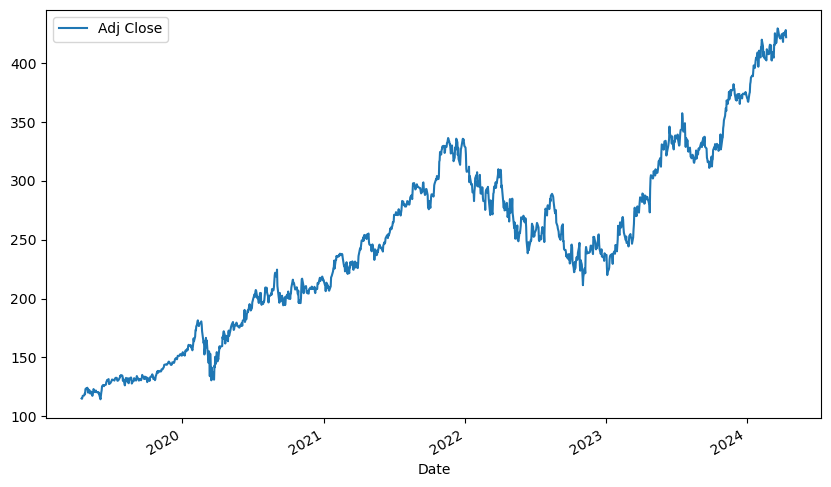

In [56]:
msft.plot(figsize=(10,6))

<Axes: title={'center': 'Microsoft Returns'}, xlabel='Date'>

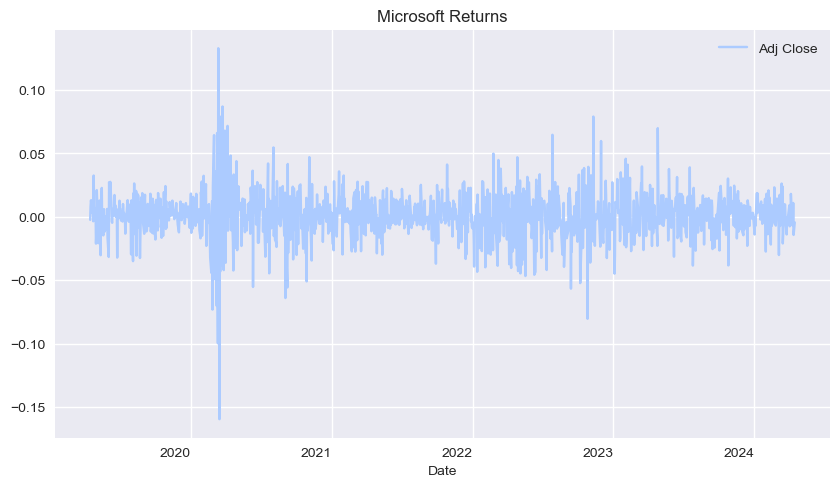

In [181]:
log_returns_msft.plot(figsize=(10, 6), color="#ACCBFF", title="Microsoft Returns", rot=0)

In [276]:
log_returns_msft.mean() *250

Adj Close    0.257059
dtype: float64

In [220]:
log_returns_msft.std()

Adj Close    0.019145
dtype: float64

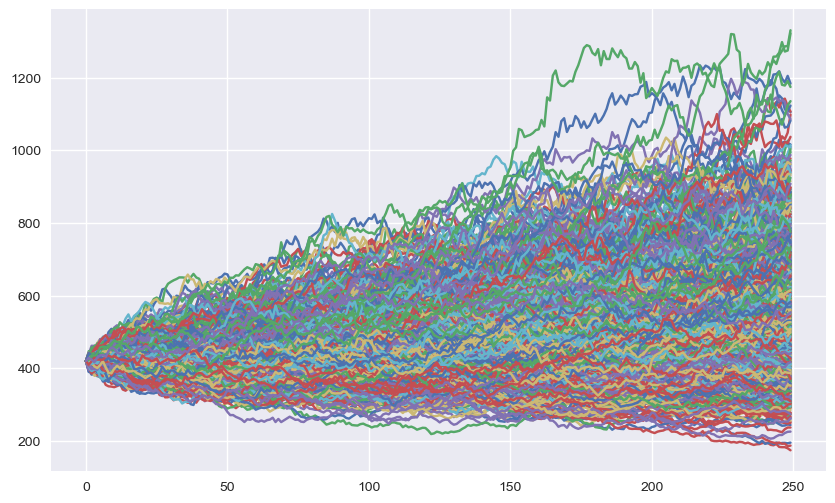

In [241]:
u_msft = log_returns_msft.mean()
var_msft = log_returns_msft.var()
drift_msft = u_msft - (.5*var)
stdev_msft = log_returns_msft.std()

t_intervals_msft = 250
iterations_msft = 1000

x_msft = np.random.rand(t_intervals_msft, iterations_msft)
Z_msft = norm.ppf(x_msft)

daily_returns_msft = np.exp(drift_msft.values + stdev_msft.values * Z_msft)
S0_msft = msft.iloc[-1]
price_list_msft = np.zeros_like(daily_returns_msft)
price_list_msft[0] = S0_msft

for t in range(1, t_intervals_msft):
    price_list_msft[t] = price_list_msft[t - 1] * daily_returns_msft[t]
    
plt.figure(figsize=(10,6))
plt.plot(price_list_msft);

In [242]:
price_list_msft.mean()

486.14199872221263

In [243]:
price_list_msft.max()

1330.2742636261776

In [244]:
price_list_msft.min()

174.3082946510076

In [245]:
price_list_msft.std()

116.5819226504233

# Johnson and Johnson

In [185]:
jnj = yf.download('JNJ', period='5y')
jnj = jnj[['Adj Close']]
jnj.tail()

[*********************100%%**********************]  1 of 1 completed


Adj Close
Date                  
2024-04-09  152.289993
2024-04-10  150.199997
2024-04-11  148.789993
2024-04-12  147.520004
2024-04-15  148.389999

In [186]:
log_returns_jnj = np.log(jnj/jnj.shift(1))
log_returns_jnj.head()

Adj Close
Date                 
2019-04-15        NaN
2019-04-16   0.010928
2019-04-17   0.003616
2019-04-18  -0.007245
2019-04-22   0.002252

<Axes: xlabel='Date'>

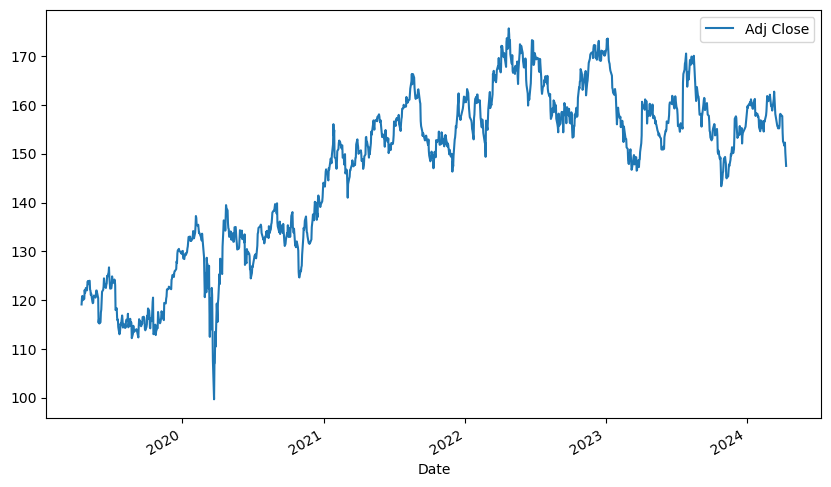

In [95]:
jnj.plot(figsize=(10,6))

In [182]:
jnj = yf.download('JNJ', period='5y')

[*********************100%%**********************]  1 of 1 completed


In [184]:
qf = cf.QuantFig(jnj, title="Johnson and Johnson Stock prices", name='JNJ')
qf.iplot()

In [188]:
log_returns_jnj.plot(figsize=(10, 6), color="#ACCBFF", title="Johnson and Johnson Returns", rot=0)

<Axes: title={'center': 'Johnson and Johnson Returns'}, xlabel='Date'>

In [278]:
log_returns_jnj.mean()*250

Adj Close    0.043654
dtype: float64

In [222]:
log_returns_jnj.std()

Adj Close    0.012486
dtype: float64

In [246]:
t_intervals_jnj = 250
iterations_jnj = 1000

x_jnj = np.random.rand(t_intervals_jnj, iterations_jnj)
Z_jnj = norm.ppf(x_jnj)

u_jnj = log_returns_jnj.mean()
var_jnj = log_returns_jnj.var()
drift_jnj = u_jnj - (.5*var)
stdev_jnj = log_returns_jnj.std()

daily_returns_jnj = np.exp(drift_jnj.values + stdev_jnj.values * Z_jnj)
S0_jnj = jnj.iloc[-1]

price_list_jnj = np.zeros_like(daily_returns_jnj)
price_list_jnj[0] = S0_jnj

for t in range(1, t_intervals_jnj):
    price_list_jnj[t] = price_list_jnj[t - 1] * daily_returns_jnj[t]

plt.figure(figsize=(10,6))
plt.plot(price_list_jnj)
plt.show()

In [247]:
price_list_jnj.max()

328.0888770540494

In [248]:
price_list_jnj.min()

81.5846563347668

In [249]:
price_list_jnj.mean()

151.1596372974391

In [250]:
price_list_jnj.std()

21.766870607841525

# JP Morgan

In [253]:
jp = yf.download('JPM', period='5y')
jp = jp[['Adj Close']]
jp.tail()

[*********************100%%**********************]  1 of 1 completed


Adj Close
Date                  
2024-04-09  197.149994
2024-04-10  195.470001
2024-04-11  195.429993
2024-04-12  182.789993
2024-04-15  182.384995

In [109]:
log_returns_jp = np.log(jp/jp.shift(1))
log_returns_jp.head()

Adj Close
Date                 
2019-04-15        NaN
2019-04-16   0.010496
2019-04-17   0.028396
2019-04-18  -0.007376
2019-04-22   0.001233

<Axes: xlabel='Date'>

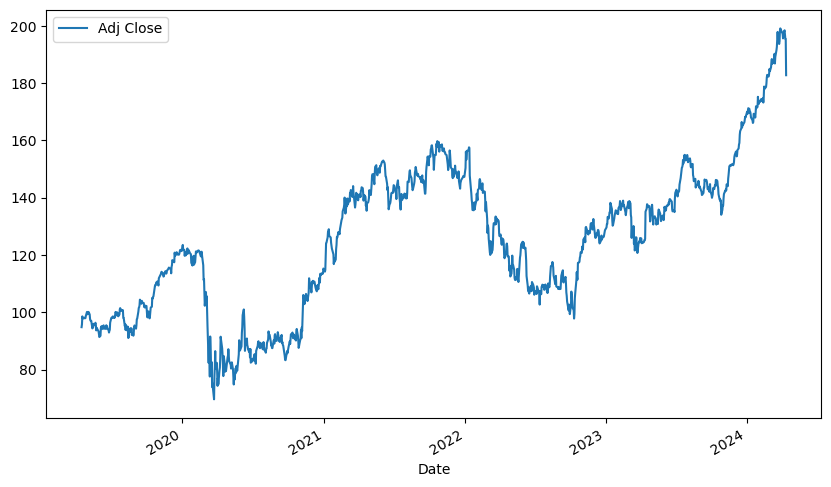

In [110]:
jp.plot(figsize=(10,6))

In [197]:
jp = yf.download('JPM', period='5y')

[*********************100%%**********************]  1 of 1 completed


In [198]:
qf = cf.QuantFig(jp, title="JPMorgan Stock prices", name='JP')
qf.iplot()

<Axes: title={'center': 'JP Morgan Returns'}, xlabel='Date'>

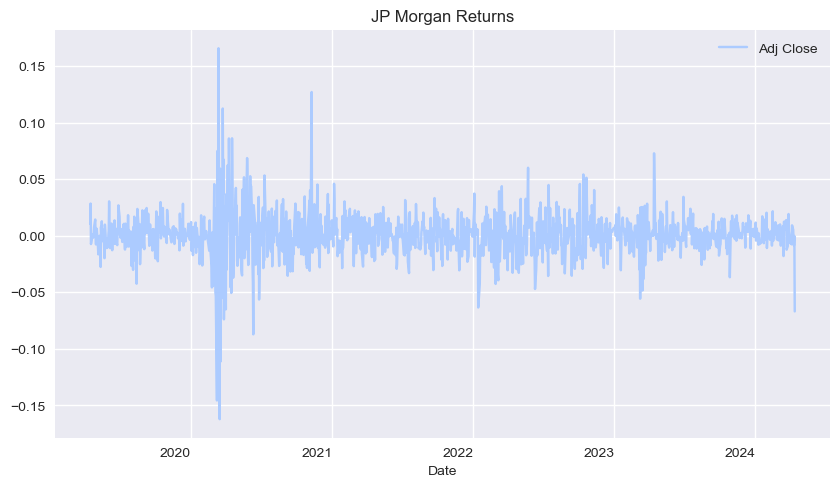

In [190]:
log_returns_jp.plot(figsize=(10, 6), color="#ACCBFF", title="JP Morgan Returns", rot=0)

<Axes: xlabel='Date'>

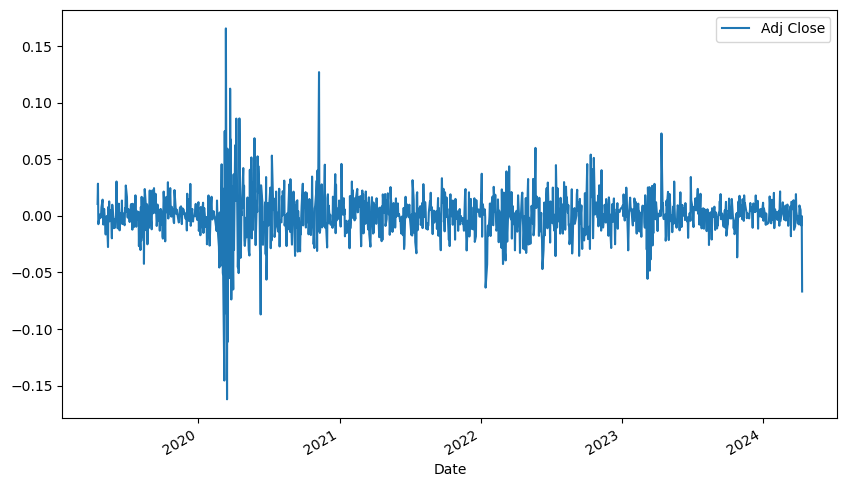

In [111]:
log_returns_jp.plot(figsize=(10,6))

In [275]:
log_returns_jp.mean() * 250

Adj Close    0.130533
dtype: float64

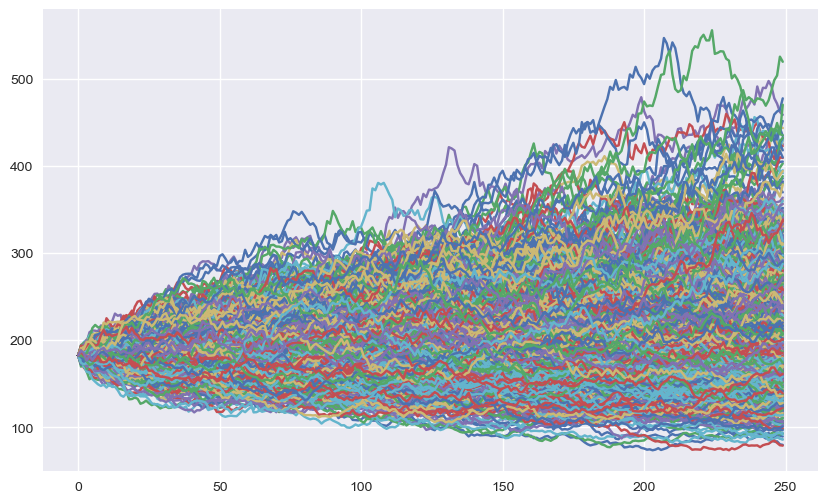

In [254]:
t_intervals_jp = 250
iterations_jp = 1000

x_jp = np.random.rand(t_intervals_jp, iterations_jp)
Z_jp = norm.ppf(x_jp)

u_jp = log_returns_jp.mean()
var_jp = log_returns_jp.var()
drift_jp = u_jp - (.5*var)
stdev_jp = log_returns_jp.std()

daily_returns_jp = np.exp(drift_jp.values + stdev_jp.values * Z_jp)
S0_jp = jp.iloc[-1]

price_list_jp = np.zeros_like(daily_returns_jp)
price_list_jp[0] = S0_jp

for t in range(1, t_intervals_jp):
    price_list_jp[t] = price_list_jp[t - 1] * daily_returns_jp[t]
plt.figure(figsize=(10,6))
plt.plot(price_list_jp);

In [255]:
price_list_jp.mean()

198.18778283532922

In [257]:
price_list_jp.max()

555.6941284847505

In [256]:
price_list_jp.min()

73.65308525043935

In [258]:
price_list_jp.std()

46.54609616340153

# Coca Cola

In [260]:
ko = yf.download('KO', period='5y')
ko = ko[['Adj Close']]
ko.tail()

[*********************100%%**********************]  1 of 1 completed


Adj Close
Date                 
2024-04-09  59.720001
2024-04-10  58.919998
2024-04-11  59.049999
2024-04-12  58.279999
2024-04-15  58.200001

<Axes: xlabel='Date'>

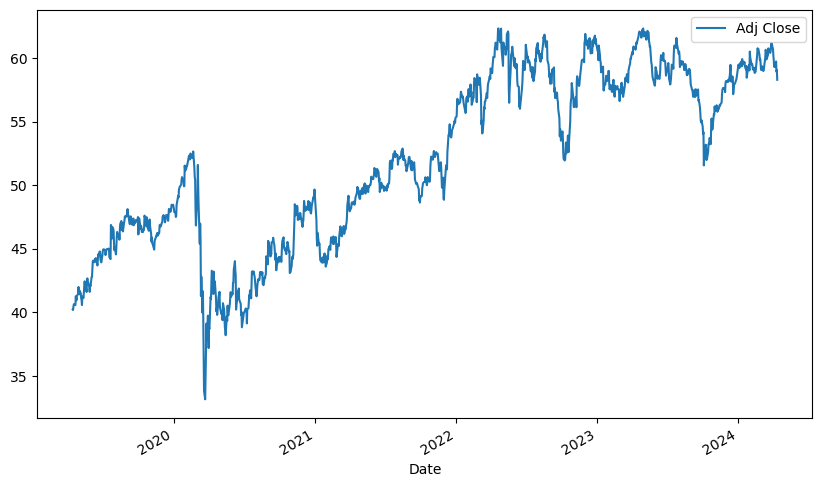

In [129]:
ko.plot(figsize=(10,6))

In [200]:
ko = yf.download('KO', period='5y')

[*********************100%%**********************]  1 of 1 completed


In [204]:
qf = cf.QuantFig(ko, title="Coca Cola Stock prices", name='KO')
qf.iplot()

In [130]:
log_returns_ko = np.log(ko/ko.shift(1))
log_returns_ko.head()

Adj Close
Date                 
2019-04-15        NaN
2019-04-16  -0.001064
2019-04-17   0.007004
2019-04-18   0.004221
2019-04-22  -0.001686

<Axes: title={'center': 'Coca Cola Returns'}, xlabel='Date'>

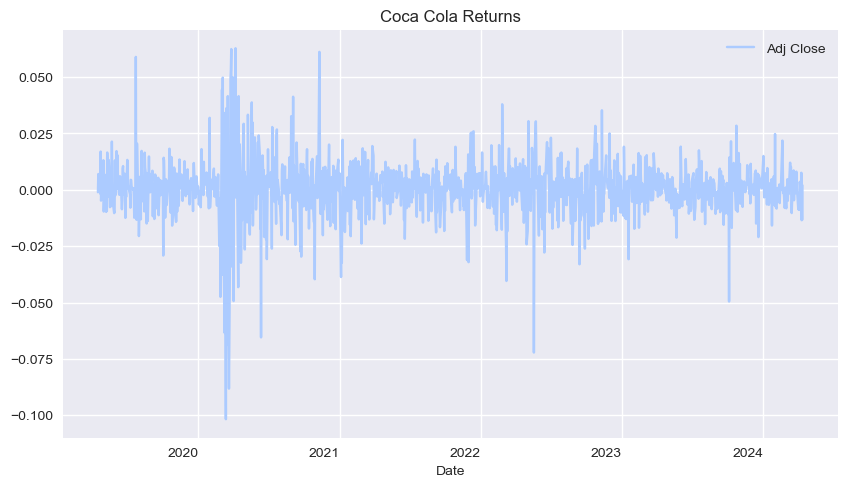

In [199]:
log_returns_ko.plot(figsize=(10, 6), color="#ACCBFF", title="Coca Cola Returns", rot=0)

In [277]:
log_returns_ko.mean()* 250

Adj Close    0.073685
dtype: float64

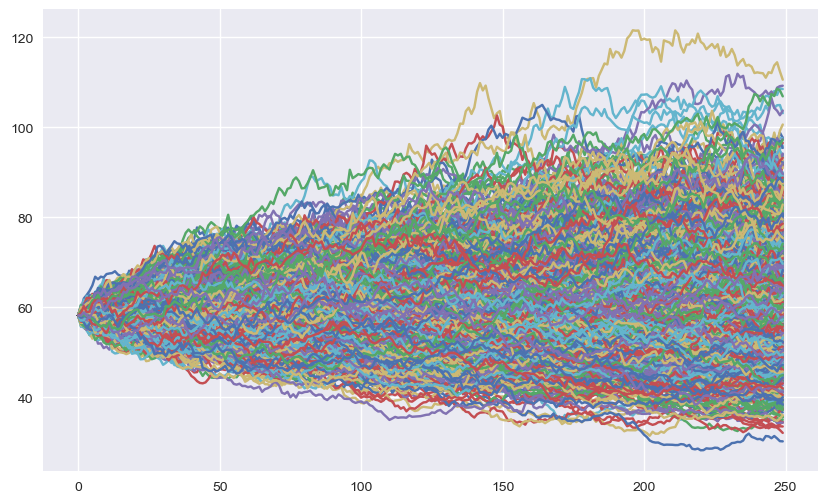

In [261]:
t_intervals_ko = 250
iterations_ko = 1000

x_ko = np.random.rand(t_intervals_ko, iterations_ko)
Z_ko = norm.ppf(x_ko)

u_ko = log_returns_ko.mean()
var_ko = log_returns_ko.var()
drift_ko = u_ko - (.5*var)
stdev_ko = log_returns_ko.std()

daily_returns_ko = np.exp(drift_ko.values + stdev_ko.values * Z_ko)


S0_ko = ko.iloc[-1]


price_list_ko = np.zeros_like(daily_returns_ko)

price_list_ko[0] = S0_ko
price_list_ko

for t in range(1, t_intervals_ko):
    price_list_ko[t] = price_list_ko[t - 1] * daily_returns_ko[t]

price_list_ko

plt.figure(figsize=(10,6))
plt.plot(price_list_ko);

In [264]:
price_list_ko.mean()

60.35834482888226

In [263]:
price_list_ko.max()

121.57650240235084

In [262]:
price_list_ko.min()

28.242665943175698

In [265]:
price_list_ko.std()

9.488229449782386

# EXxon Mobil

In [267]:
xom = yf.download('XOM', period='5y')
xom = xom[['Adj Close']]
xom.tail()

[*********************100%%**********************]  1 of 1 completed


Adj Close
Date                  
2024-04-09  121.180000
2024-04-10  122.199997
2024-04-11  121.790001
2024-04-12  120.370003
2024-04-15  119.669998

<Axes: xlabel='Date'>

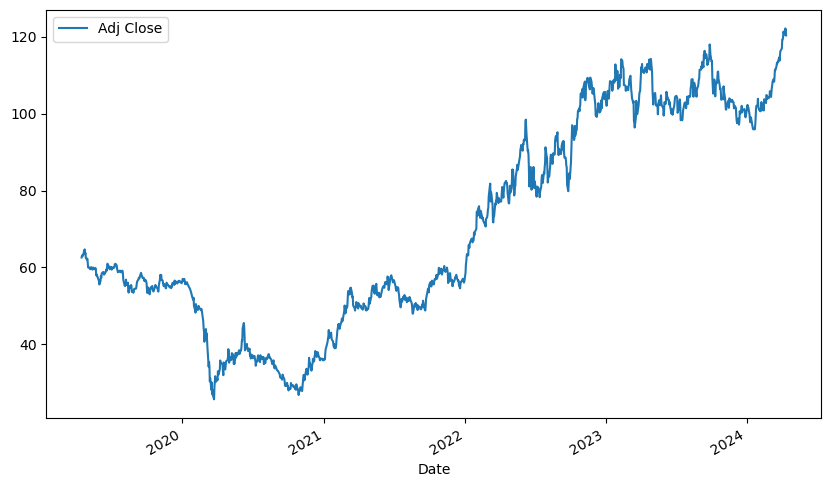

In [139]:
xom.plot(figsize=(10,6))

In [140]:
log_returns_xom = np.log(xom/xom.shift(1))
log_returns_xom.head()

Adj Close
Date                 
2019-04-15        NaN
2019-04-16   0.006796
2019-04-17   0.002829
2019-04-18  -0.003691
2019-04-22   0.021582

In [203]:
xom = yf.download('XOM', period='5y')

[*********************100%%**********************]  1 of 1 completed


In [209]:
qf = cf.QuantFig(xom, title="ExxonMobil Stock prices", name='xom')
qf.iplot()

In [208]:
log_returns_xom.plot(figsize=(10,6), color="#ACCBFF", title="ExxonMobil Returns", rot=0)

<Axes: title={'center': 'ExxonMobil Returns'}, xlabel='Date'>

In [279]:
log_returns_xom.mean()* 250

Adj Close    0.130157
dtype: float64

In [268]:
t_intervals_xom = 250
iterations_xom = 1000

x_xom = np.random.rand(t_intervals_xom, iterations_xom)
Z_xom = norm.ppf(x_xom)

u_xom = log_returns_xom.mean()
var_xom = log_returns_xom.var()
drift_xom = u_xom - (.5*var)
stdev_xom = log_returns_xom.std()

daily_returns_xom = np.exp(drift_xom.values + stdev_xom.values * Z_xom)


S0_xom = xom.iloc[-1]


price_list_xom = np.zeros_like(daily_returns_xom)

price_list_xom[0] = S0_xom
price_list_xom

for t in range(1, t_intervals_xom):
    price_list_xom[t] = price_list_xom[t - 1] * daily_returns_xom[t]

price_list_xom

plt.figure(figsize=(10,6))
plt.plot(price_list_xom);

In [269]:

price_list_xom.mean()

130.91498970800657

In [272]:
price_list_xom.max()

366.4179342207247

In [271]:
price_list_xom.min()

42.80614499356203

In [270]:
price_list_xom.std()

33.64530854313688